# Demos: Lecture 07

## Demo 1: Expectation values

In [23]:
import pennylane as qml
from pennylane import numpy as np # pennylane has own version of numpy

In [24]:
dev = qml.device("default.qubit", wires=1, shots=100)

@qml.qnode(dev)
def measure_z():
    qml.RX(2*np.pi/3, wires=0)
    return qml.sample(qml.PauliZ(0))

In [25]:
measure_z()

tensor([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,
        -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
        -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
         1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        -1, -1,  1, -1], requires_grad=True)

In [26]:
np.mean(measure_z())

tensor(-0.46, requires_grad=True)

In [27]:
# setup analytic device aka no shots set
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_z_perfectly():
    qml.RX(2*np.pi/3, wires=0)
    return qml.expval(qml.PauliZ(0)) # acting on wire 0

In [28]:
measure_z_perfectly()

tensor(-0.5, requires_grad=True)

In [29]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.Hadamard(wires=0)
    qml.CRX(x, wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


In [30]:
circuit(0.2)

tensor(0.00996671, requires_grad=True)

In [31]:
@qml.qnode(dev)
def circuit(x):
    qml.Hadamard(wires=0)
    qml.CRX(x, wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(0))

In [32]:
circuit(0.2)

tensor([-5.55111512e-17, -5.55111512e-17], requires_grad=True)

## Demo 2: gradient of a quantum circuit

<img src="fig/pauliz_opt.png" width="400px">

In [33]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def pqc(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

import matplotlib.pyplot as plt

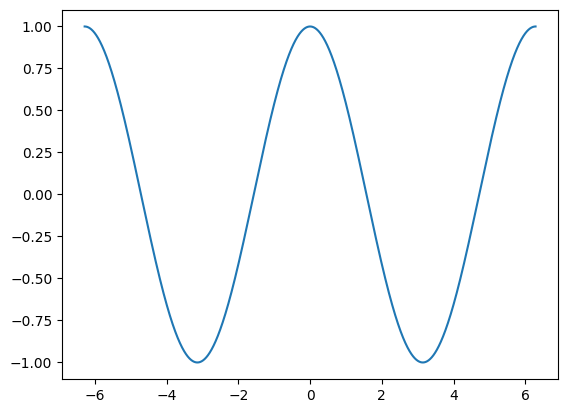

In [34]:
theta_vals = np.linspace(-2 * np.pi, 2 * np.pi, 10000)
plt.plot(theta_vals, [pqc(t) for t in theta_vals])
# see expectation value minimized at pi and -pi

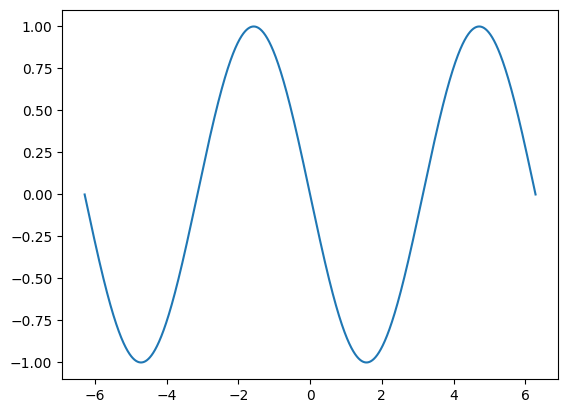

In [35]:
gradient_fxn = qml.grad(pqc) # similar to adjoint, returns fxn that computes gradient
plt.plot(theta_vals, [gradient_fxn(t) for t in theta_vals])
# returns sin function

## Demo 3: training a small PQC

In [41]:
# solve an optimization problem
opt = qml.GradientDescentOptimizer(step_size=0.1)

num_iter = 50

storage = []

# set initial value
init_param = np.array(0.2)
params = init_param

for _ in range(num_iter):
    params, _cost = opt.step_and_cost(pqc, params)
    storage.append(_cost)

TypeError: GradientDescentOptimizer.__init__() got an unexpected keyword argument 'step_size'

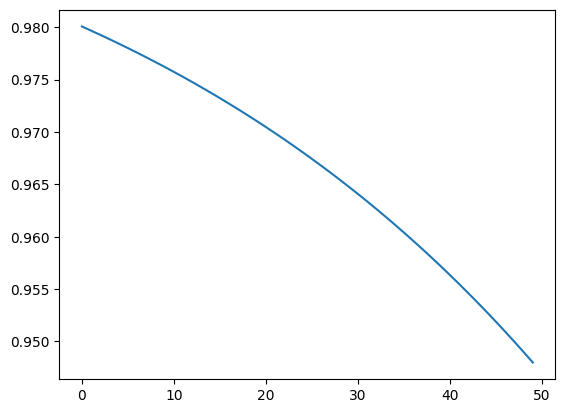

In [42]:
plt.plot(storage)
# might need more iterations or increase step size to converge